# Problema

Implementación de la regresión lineal

## Instrucciones

Generar una implementación correcta de la regresión lineal usando el descenso del gradiente como método de optimización de los pesos y compararlo con la implementación directa de la librería sklearn (los valores de w y b no serán exactamente iguales pero muy similares)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error


In [2]:
# Generación del dataset
np.random.seed(0)  # Para reproducibilidad
X = np.random.uniform(1, 10, 5000)  # Generar 5000 valores aleatorios para las horas de estudio
error = np.random.normal(0, 5, 5000)  # Generar errores aleatorios
y = 50 + 5 * X + error  # Generar la puntuación del examen

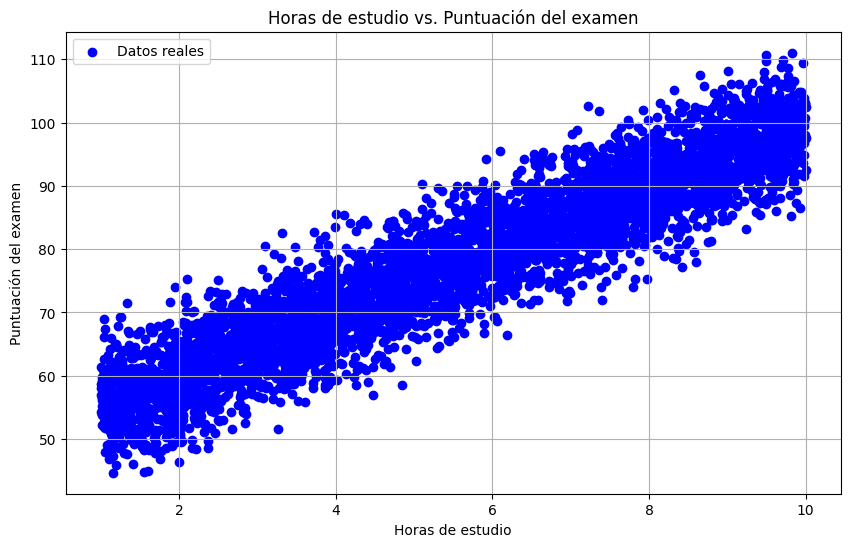

In [3]:
# Visualización de los datos
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Datos reales')
plt.xlabel('Horas de estudio')
plt.ylabel('Puntuación del examen')
plt.title('Horas de estudio vs. Puntuación del examen')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
# Dividir los datos en conjuntos de entrenamiento y prueba (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dividir el conjunto de entrenamiento en conjuntos de entrenamiento y validación (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print('Datos de Entrenamiento:', X_train.shape[0])
print('Datos de Validación:', X_val.shape[0])
print('Datos de Test:', X_test.shape[0])

Datos de Entrenamiento: 3200
Datos de Validación: 800
Datos de Test: 1000


## Implementación manual de la regresión con gradiente descendente

In [6]:
# Función de costo (Mean Squared Error)
def cost_function(y_true, y_pred):
    n = len(y_true)
    mse = np.mean((y_true - y_pred)**2)
    return mse

# Gradiente descendente para ajustar los parámetros del modelo
def train_regression(X_train, y_train, X_val, y_val, lr, epochs):
    # Inicializar los coeficientes (pesos) w y b
    w = np.random.randn(1)
    b = np.random.randn(1)

    train_loss_per_epoch = []
    val_loss_per_epoch = []

    for epoch in range(epochs):
        # Calcular y_pred del conjunto de entrenamiento
        y_train_pred = w * X_train + b

        # Calcular la pérdida de entrenamiento
        train_loss = cost_function(y_train, y_train_pred)
        train_loss_per_epoch.append(train_loss)

        # Calcular los gradientes para los pesos w y b
        grad_w = (-2 / len(X_train)) * np.sum((y_train - y_train_pred) * X_train)
        grad_b = (-2 / len(X_train)) * np.sum(y_train - y_train_pred)

        # Actualizar los pesos w y b
        w -= lr * grad_w
        b -= lr * grad_b

        # Calcular y_pred del conjunto de validación
        y_val_pred = w * X_val + b

        # Calcular la pérdida de validación
        val_loss = cost_function(y_val, y_val_pred)
        val_loss_per_epoch.append(val_loss)

    return w, b, train_loss_per_epoch, val_loss_per_epoch

In [7]:
# Definir hiperparámetros
lr = 0.01
epochs = 1000

# Entrenar el modelo de regresión lineal
w, b, train_loss_per_epoch, val_loss_per_epoch = train_regression(X_train, y_train, X_val, y_val, lr, epochs)

# Imprimir los coeficientes aprendidos
print("Coeficiente w:", w)
print("Término independiente b:", b)



Coeficiente w: [5.23553984]
Término independiente b: [48.3401528]


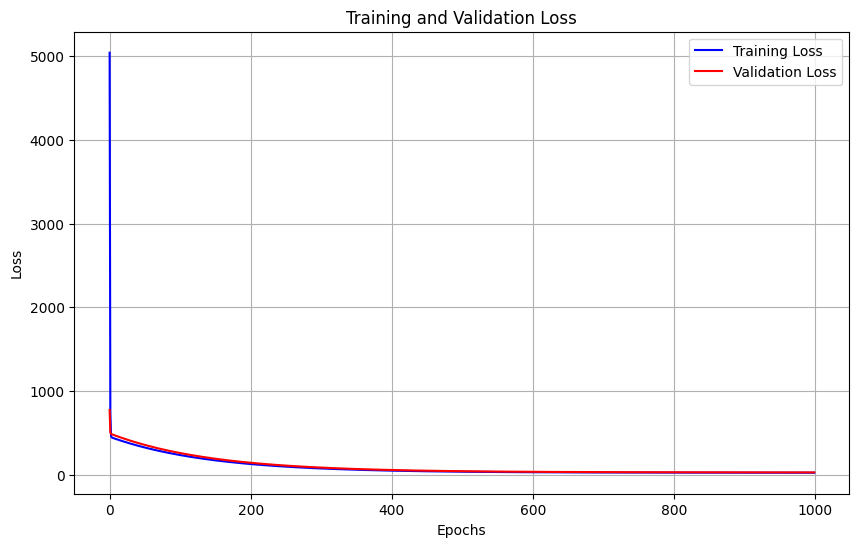

In [8]:
# Visualizar las pérdidas a lo largo de las epochs
plt.figure(figsize=(10, 6))
plt.plot(range(epochs), train_loss_per_epoch, color='blue', label='Training Loss')
plt.plot(range(epochs), val_loss_per_epoch, color='red', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


Costo del modelo: 25.889893365917064


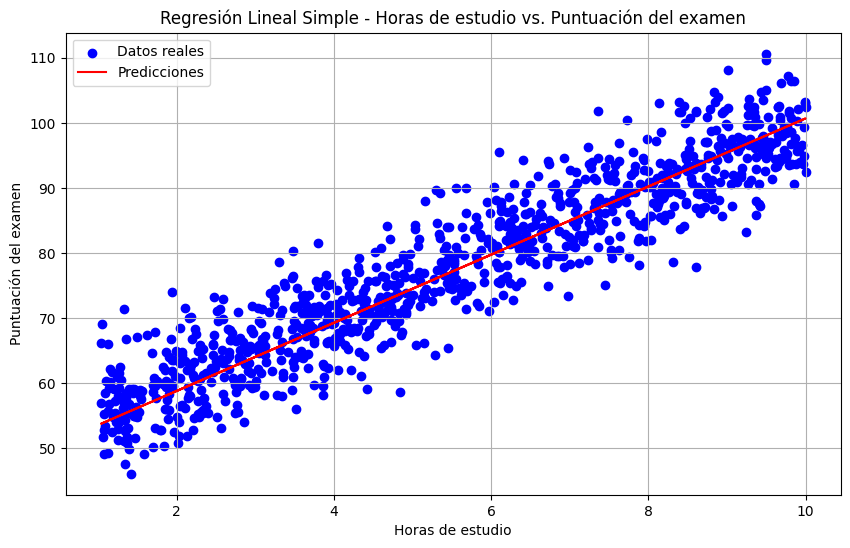

In [9]:
# Realizar predicciones en test
y_pred = w * X_test + b

# Calcular el costo
cost = cost_function(y_test, y_pred)

print("Costo del modelo:", cost)

# Visualización del modelo
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', label='Predicciones')
plt.xlabel('Horas de estudio')
plt.ylabel('Puntuación del examen')
plt.title('Regresión Lineal Simple - Horas de estudio vs. Puntuación del examen')
plt.legend()
plt.grid(True)
plt.show()


In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

# Calcular las métricas de evaluación mse, mae, r2 y mape
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print("MSE en el conjunto de test:", mse)
print("MAE en el conjunto de test:", mae)
print("R^2 en el conjunto de test:", r2)
print("MAPE en el conjunto de test:", mape)


MSE en el conjunto de test: 25.889893365917064
MAE en el conjunto de test: 4.007706418504842
R^2 en el conjunto de test: 0.8701092132448653
MAPE en el conjunto de test: 0.05307233200192738


## Implementación de la regresión lineal usando sklearn

In [12]:
from sklearn.linear_model import LinearRegression

# Crear el modelo de regresión lineal con sklearn
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train.reshape(-1, 1), y_train)

print("Modelo entrenado:", model)



Modelo entrenado: LinearRegression()


Costo del modelo: 25.252964425596577


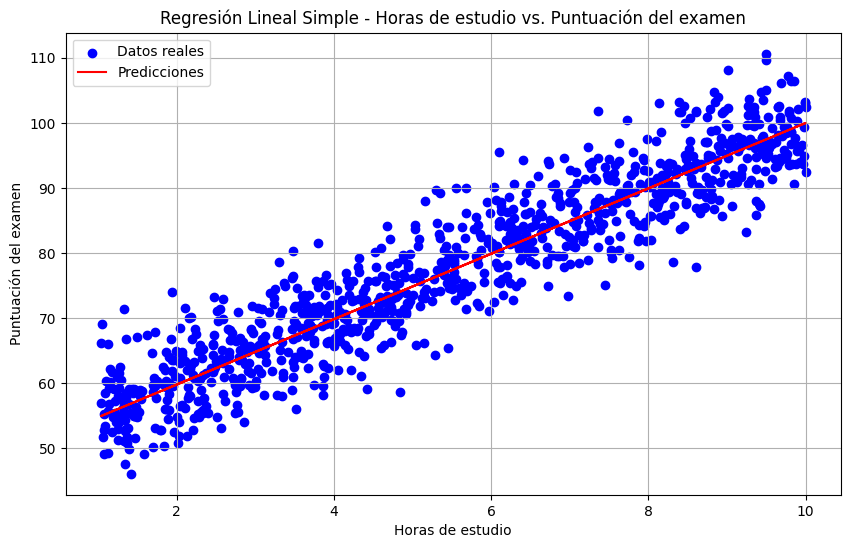

In [13]:
# Realizar predicciones en test
y_pred = model.predict(X_test.reshape(-1, 1))

# Calcular el costo
cost = mean_squared_error(y_test, y_pred)

print("Costo del modelo:", cost)

# Visualización del modelo
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', label='Predicciones')
plt.xlabel('Horas de estudio')
plt.ylabel('Puntuación del examen')
plt.title('Regresión Lineal Simple - Horas de estudio vs. Puntuación del examen')
plt.legend()
plt.grid(True)
plt.show()


In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

# Realizar predicciones en el conjunto de entrenamiento
y_train_pred = model.predict(X_train.reshape(-1, 1))

# Calcular las métricas de evaluación mse, mae, r2 y mape
mse = mean_squared_error(y_train, y_train_pred)
mae = mean_absolute_error(y_train, y_train_pred)
r2 = r2_score(y_train, y_train_pred)
mape = mean_absolute_percentage_error(y_train, y_train_pred)

print("MSE en el conjunto de entrenamiento:", mse)
print("MAE en el conjunto de entrenamiento:", mae)
print("R^2 en el conjunto de entrenamiento:", r2)
print("MAPE en el conjunto de entrenamiento:", mape)


MSE en el conjunto de entrenamiento: 23.474545062495253
MAE en el conjunto de entrenamiento: 3.834987243291654
R^2 en el conjunto de entrenamiento: 0.8766302290070875
MAPE en el conjunto de entrenamiento: 0.051546550082279236


## Comparación de parámetros obtenidos

In [15]:
b_sklearn = model.intercept_
w_sklearn = model.coef_[0]

print("Coeficiente de intercepción (b) - Manual:", b)
print("Coeficiente de pendiente (w) - Manual:", w)
print("Coeficiente de intercepción (b) - Scikit-learn:", b_sklearn)
print("Coeficiente de pendiente (w) - Scikit-learn:", w_sklearn)


Coeficiente de intercepción (b) - Manual: [48.3401528]
Coeficiente de pendiente (w) - Manual: [5.23553984]
Coeficiente de intercepción (b) - Scikit-learn: 49.7409163841056
Coeficiente de pendiente (w) - Scikit-learn: 5.024644665080553
